### Deutsch Jozsa Algorithm!

We are given an oracle that implements either a constant function or a balanced function.
With just one query, we can find out which one it is.

---
Done as part of the NPTEL Course - Introduction to Quantum Computing: Quantum Algorithms and Qiskit
https://onlinecourses.nptel.ac.in/noc21_cs103/preview

In [19]:
# Importingstandard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# Loading the IBM Q Account
provider = IBMQ.load_account()
print("Process Complete!")

ibmqfactory.load_account:WARNING:2021-10-20 10:21:09,595: Credentials are already in use. The existing account in the session will be replaced.


Process Complete!


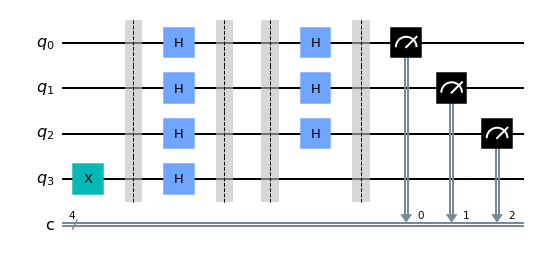

In [35]:
"""
f is constant, f(x) = 0
There's only 1 way of making a constant function such that f(x) = 0

Important!
While giving an arbitrary input like 011, apply the NOT gate to to q1 and q2.
Then, before taking the final measurement, apply the NOT gate to q1 and q2 again for it again.
"""
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

"""
Making the input |0001>
"""
circuit.x(qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])


"""
Step 1 - Hadamard Transform
Setting the state to |+++->
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])

"""
Step 2 - Implementation of the Oracle
Constant function, gives 0
"""
None
circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])


"""
Step 3 - Hadamard on Input Qubits
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()

"""
Step 4 - Measure the first n qubits
"""
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

Counts: {'0000': 1024}


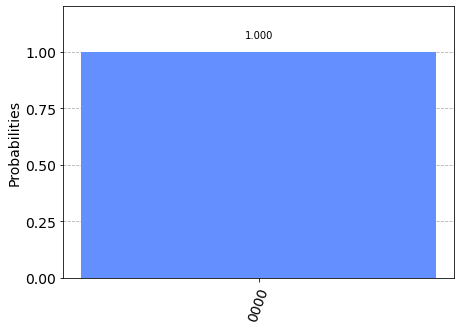

In [36]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(circuit, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(circuit)

print("Counts:", counts)
plot_histogram(counts)

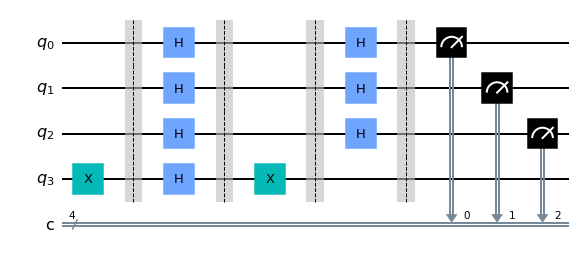

In [41]:
"""
f is constant, f(x) = 1
There's only 1 way of making a constant function such that f(x) = 1
"""
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

"""
Making the input |0001>
"""
circuit.x(qreg_q[3])
circuit.barrier()

"""
Step 1 - Hadamard Transform
Setting the state to |+++->
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier()

"""
Step 2 - Implementation of the Oracle
Constant function, gives 1
"""
circuit.x(qreg_q[3])
circuit.barrier()


"""
Step 3 - Hadamard on Input Qubits
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()

"""
Step 4 - Measure the first n qubits
"""
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

Counts: {'0000': 1024}


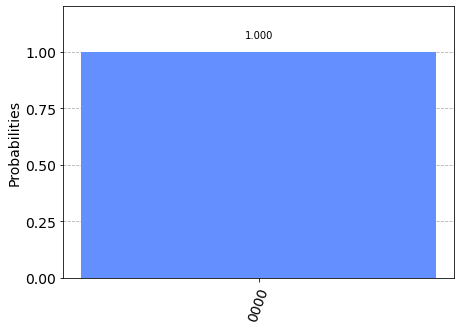

In [42]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(circuit, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(circuit)

print("Counts:", counts)
plot_histogram(counts)

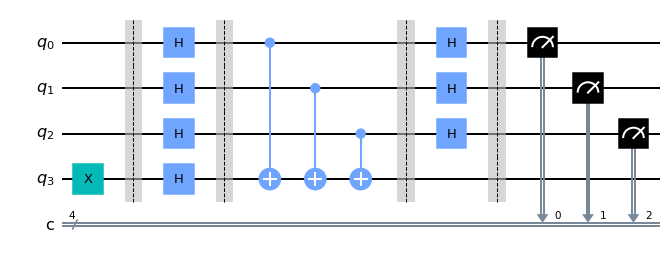

In [43]:
"""
f is balanced
There are many ways of implementing a balanced function.
One way is by using consecutive CNOTs
"""
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

"""
Making the input |0001>
"""
circuit.x(qreg_q[3])
circuit.barrier()

"""
Step 1 - Hadamard Transform
Setting the state to |+++->
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier()

"""
Step 2 - Implementation of the Oracle
Balanced function with CNOT
"""
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier()


"""
Step 3 - Hadamard on Input Qubits
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()

"""
Step 4 - Measure the first n qubits
"""
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

Counts: {'0111': 1024}


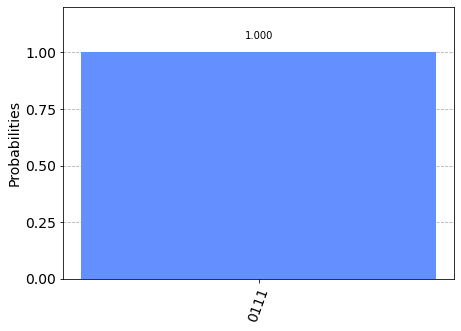

In [44]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(circuit, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(circuit)

print("Counts:", counts)
plot_histogram(counts)

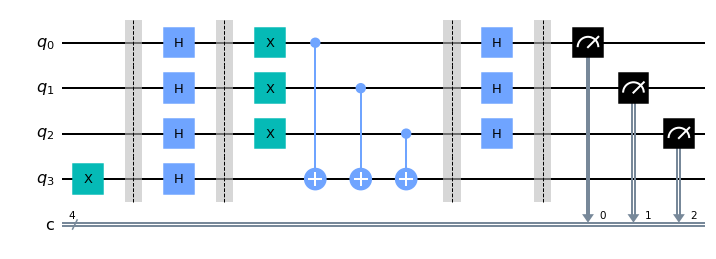

In [45]:
"""
f is balanced
There are many ways of implementing a balanced function.
One way is by using consecutive CNOTs.
We can use any number of NOTs as well in this oracle
"""
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

"""
Making the input |0001>
"""
circuit.x(qreg_q[3])
circuit.barrier()

"""
Step 1 - Hadamard Transform
Setting the state to |+++->
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier()

"""
Step 2 - Implementation of the Oracle
Balanced function with CNOTs and NOTs
"""
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.x(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier()


"""
Step 3 - Hadamard on Input Qubits
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()

"""
Step 4 - Measure the first n qubits
"""
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

Counts: {'0111': 1024}


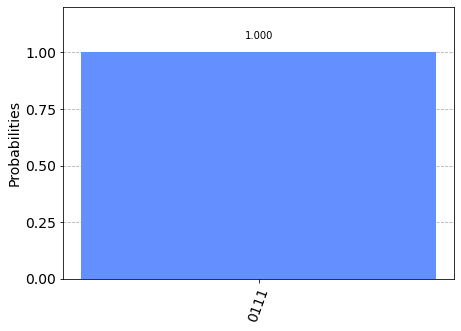

In [46]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(circuit, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(circuit)

print("Counts:", counts)
plot_histogram(counts)